# Data processing and graph generation for NaCl 

In [7]:
import os
import csv 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tkinter import *
from tkinter import filedialog
from matplotlib import pylab as pylab
import matplotlib.gridspec as gridspec
from scipy import signal


In [21]:
def dir_select(start_dir = None):
    '''Directory selection to later read all relevant files from directory, need tkinter and filedialog
    WARNING: do not forget '/' or '\\' (python vs win) before file name'''
    root=Tk()
    directory=filedialog.askdirectory(initialdir=start_dir)
    root.destroy()
    #print(directory)
    return directory

def all_extension_select(directory, extension):
    ''' Creates list with all files pertaining to relevant extension for the folder inserted as directory'''
    all_files_names=os.listdir(directory)
#    print(all_files_names , '\n')
    txt_files=list()
    for a in range(len(all_files_names)):
        if all_files_names[a].find(extension)>0:
            txt_files.insert(a, all_files_names[a])
    #print(txt_files)
    return txt_files

def textfile_to_linelist(txtfilepath):
    '''Creates a list of strings from the text file !!Give complete file path with directory'''
    with open(txtfilepath,  encoding='utf8', errors='ignore') as f:
        lines=f.readlines()
        f.close()
    return lines
def file_select(start_dir=None):
    root=Tk()
    filepath=filedialog.askopenfilename(initialdir=start_dir)
    root.destroy()
    return filepath

In [56]:
def OCP_to_array(filepath_list):
    '''Takes a list with the complete filepath of each OCP.txt file and returns 2lists : header and unit as well as an array with rows for data, column for data type and depth for file in the list'''
    OCP_lines=textfile_to_linelist(filepath_list[0])
    OCP_headers_str=OCP_lines[49].split('\t')
    OCP_units_str=OCP_lines[50].split('\t')
    OCP_headers_str.pop(0)
    OCP_units_str.pop(0)
    OCP_headers_str.pop(-2)
    OCP_units_str.pop(-2)
    
    
    OCP__array=np.zeros((len(OCP_lines[51:]),len(OCP_headers_str), len(filepath_list))) #array initialisation needs the first file to have already been scanned to determine row x columns size 
    for i in range(len(filepath_list)): #for each OCP file in chosen folder we need to split the read lines from the txt file into a list with the columns seperated
        OCP__lines=textfile_to_linelist(filepath_list[i])
        OCP__data=[data.split('\t') for data in OCP__lines[51:]]
        for data in OCP__data:
            data.pop(0) # We pop the empty list
            data.pop(-2)# We pop the column of text (no idea what it is)
        row=0 # Array index initiation
        file_index=i # Easier to read 
        for data in OCP__data: # For row in the data
            col=0 # Array index initiation
            for each in data: # For each entry in the row (loop over the different columns: 0 then 1 then 2 etc...) 
                each=each.replace(',', '.') # txt file contains comas instead of point which are prefered to read floats (decimals)
                each=each.replace('\n', '') # last entry has a \n character to be removed
                OCP__array[row,col, file_index]=float(each) # Filling the np array
                col+=1 # Indexation incrementation for next iteration of the loop which will look at the next data 'column'
            row+=1 # once the first row is processed we increment row index
    return OCP_headers_str , OCP_units_str , OCP__array

def EIS_to_array(filepath_list):
    '''Takes a list with the complete filepath of each EIS.txt file and returns 2lists : header and unit as well as an array with rows for data, column for data type and depth for file in the list'''
    EIS_lines=textfile_to_linelist(filepath_list[0])
    EIS_headers_str=EIS_lines[54].split('\t')
    EIS_units_str=EIS_lines[55].split('\t')
    EIS_headers_str.pop(0)
    EIS_units_str.pop(0)
    
    
    EIS__array=np.zeros((len(EIS_lines[56:]),len(EIS_headers_str), len(filepath_list)))
    for i in range(len(filepath_list)):
        EIS__lines=textfile_to_linelist(filepath_list[i])
        EIS__data=[data.split('\t') for data in EIS__lines[56:]]
        row=0
        for data in EIS__data:
            data.pop(0)
            col=0
            for each in data:
                each=each.replace(',', '.')
                each=each.replace('\n', '')
                EIS__array[row,col, i]=float(each)
                col+=1
            row+=1
    return EIS_headers_str, EIS_units_str, EIS__array

def POTDYN_to_array(filepath_list):
    '''Takes filepath list of POTDYN.txt files and returns headers, uits (lists) and data array'''
    POTDYN_lines=textfile_to_linelist(filepath_list[0])
    POTDYN_headers=POTDYN_lines[57].split('\t')
    POTDYN_units=POTDYN_lines[58].split('\t')
    POTDYN_headers.pop(0)
    POTDYN_headers.pop(-2)
    POTDYN_units.pop(0)
    POTDYN_units.pop(-2)
    
    POTDYN__array=np.zeros((len(POTDYN_lines[59:]), len(POTDYN_headers), len(filepath_list)))
    
    for i in range(len(filepath_list)):
        POTDYN__lines=textfile_to_linelist(filepath_list[i])
        POTDYN__data=[data.split('\t') for data in POTDYN__lines[59:]]
        row=0
        for data in POTDYN__data:
            data.pop(0)
            data.pop(-2)
            col=0

            for each in data:
                each=each.replace(',', '.')
                each=each.replace('\n', '')
                POTDYN__array[row,col, i]=float(each)
                col+=1
            row+=1
    return POTDYN_headers, POTDYN_units, POTDYN__array

                   
def sort_files(filepath_list):
    '''Return 4 lists: OCP# files, EIS# files from cycles OCP after cycles and POTDYN '''
    OCP_cycle_filepath_list=[]
    EIS_cycle_filepath_list=[]
    OCP_filepath_list=[]
    POTDYN_filepath_list=[]

    for file in filepath_list:
        if file.find('OCP')>0 and file.find('#')>0:
            OCP_cycle_filepath_list.append(file)
        if file.find('EIS')>0 and file.find('#')>0:
            EIS_cycle_filepath_list.append(file)
        if file.find('OCP')>0 and not file.find('#')>0:
            OCP_filepath_list.append(file)
        if file.find('POTDYN')>0:
            POTDYN_filepath_list.append(file)
    OCP_cycle_filepath_list.sort()
    EIS_cycle_filepath_list.sort()
    OCP_filepath_list.sort()
    POTDYN_filepath_list.sort()
    return OCP_cycle_filepath_list, EIS_cycle_filepath_list, OCP_filepath_list, POTDYN_filepath_list
    
    


In [37]:
colors=['#111111', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55', '#55aa55', '#5500aa', '#5555aa']

# First: directory selection:
Select directory containing relevant .txt files

In [27]:
directory=dir_select(start_dir='/home/dasilvatousch/PydataWork/')
file_extension='.txt'
txt_files=all_extension_select(directory, file_extension)
i=0
for i in range(len(txt_files)):
    txt_files[i]=directory+'/'+txt_files[i]
    
OCP_cycle_filepaths, EIS_cycle_filepaths, OCP_filepath, POTDYN_filepath=sort_files(txt_files)



In [57]:
OCP_cycle_header, OCP_cycle_units, OCP_cycle_array=OCP_to_array(OCP_cycle_filepaths)
EIS_header, EIS_units, EIS_cycle_array=EIS_to_array(EIS_cycle_filepaths)
OCP_header, OCP_units, OCP_array=OCP_to_array(OCP_filepath)
POTDYN_header, POTDYN_units, POTDYN_array=POTDYN_to_array(POTDYN_filepath)


[ 0.00000e+00  1.00000e+00 -7.50555e-01 -2.14357e-08  0.00000e+00
 -7.50700e-01  1.41851e-03  4.00000e+00 -3.27620e+02]


# Plotting both anodic and cathodic results:

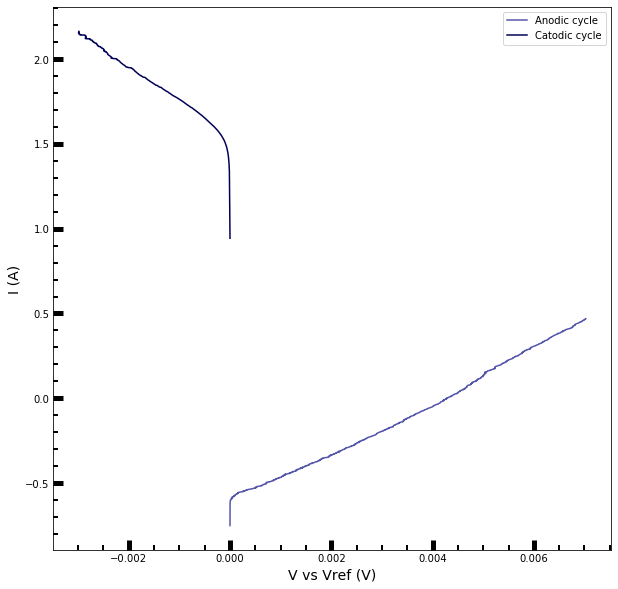

In [18]:
fig=plt.figure(figsize=(10,10))
plt.plot(APOT[:,3],APOT[:,2], label='Anodic cycle', color='#5555aa')
plt.plot(CPOT[:,3], abs(CPOT[:,2]), label='Catodic cycle', color='#000055')

plt.xlabel('V vs Vref (V)', fontsize=14)
plt.ylabel('I (A)', fontsize=14)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, direction='in', width=5)
plt.tick_params(axis='both', which='minor', length=5, direction='in', width=2)
plt.show()